## DTMF Project Part 4: Decoding of entire phone numbers

In [1]:
# Import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import statistics
from statistics import stdev
from collections import Counter
from scipy.io import wavfile

### Objective
In this part of the project you need to decide entire phone numbers that were encoded in form of a DTMF sound file. Each phone number consists of 10 digits separated by short moments of silence. In addition, the sounds are corrupted by a slight amount of noise.

There are 100 sound files in total each encoding a 10 digit phone number. The wav-files are compressed in the zip-file **`All_Numbers.zip`**. Your task is to determine the 100 numbers. 

Remember: You need to provide references for all sources that you use.

### Fast Fourier Transform (FFT)

Ideally, you use the method you developed and tested in Part 3 of the project. However, here is an alternative. Basically, for each digit, we want to know what frequencies are present in the two sinusoids. Once we know the frequency, we can easily determine the digit using a simple conditional statement.

Let's assume we have a signal $y(t)$ that is one second long and contains the frequencies $f_1 = 100$ Hz and $f_2 = 300$ Hz.

$$y(t)=A_1 \cos(2\pi f_1 t+\phi_1)+A_2 \cos(2\pi f_2 t+\phi_2)$$


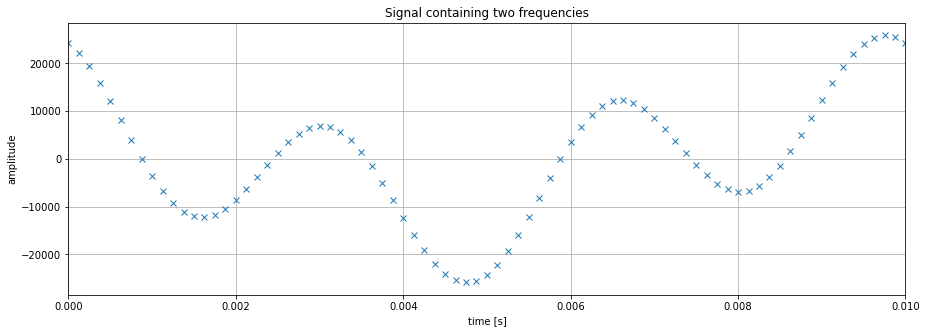

In [2]:
A1 = 0.35 # amplitude
f1 = 100 # frequency of tone A
phi1 = np.pi/2 # phase shift

A2 = 0.45 # amplitude
f2 = 300 # frequency of tone A
phi1 = np.pi/8 # phase shift

fs=8000;
B=16;

t=np.arange(0,1,1/fs) # discretized time (1 second duration)
y=A1*np.cos(2*np.pi*f1*t+phi1) + A2*np.cos(2*np.pi*f2*t+phi1) # discretized signal y(t)

yq = (2**(B-1))*y 
yq = yq.astype(np.int16) # convert to integer 16-bit format

# Create graph
figure1=plt.figure(figsize = (15,5))
plt.plot(t, yq, marker = 'x', linestyle = '')
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.title("Signal containing two frequencies")
plt.grid()
plt.xlim([0,0.01])
plt.show()

In [3]:
# Store as wav-file
wavfile.write("my_sound.wav", fs, yq)

# read signal from wav-file
sampling_rate, data = wavfile.read("my_sound.wav")
data=np.array(data) # convert to numpy array

In [4]:
# calculate fft of signal
Yfreq = np.fft.fft(data)
frequencies = np.arange(0,np.shape(data)[0])/np.shape(data)[0]*sampling_rate

# calculate the amplitude distribution as a function of frequency
Yfreq_abs = abs(Yfreq)

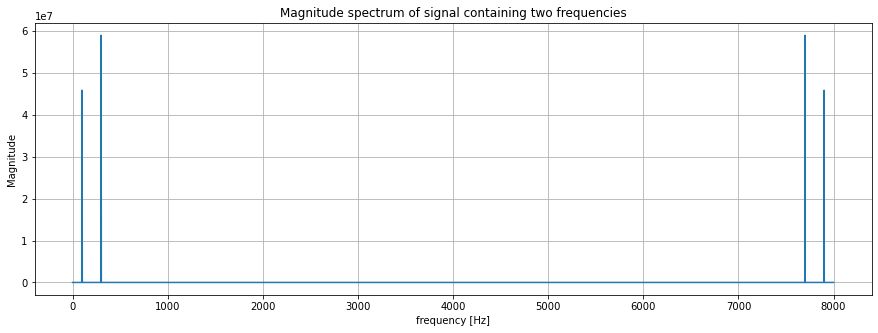

In [5]:
# graph result
figure2=plt.figure(figsize = (15,5))
plt.plot(frequencies, Yfreq_abs, linestyle = '-')
plt.xlabel("frequency [Hz]")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of signal containing two frequencies")
plt.grid()
#plt.xlim([0,2000])
plt.show()

Note that we see two vertical lines (high amplitudes) at the frequencies $f_1=100$ Hz and $f_2=300$ Hz. We also see the same lines again at $f_s-f_1$ and $f_s-f_2$, where $f_s=8000$ Hz denotes the sampling frequency that we applied. These frequencies are not really present but are artefacts of the Fast Fourier Transform (FFT). If you are majoring in electrical engineering or computer engineering, you will learn more about the FFT during your junior year. 

For now and this project, all you need to know is that the meaningful frequencies are in the range $[0, f_s/2] = [0, 4000 Hz]$ and you can ignore whatever happens outside of this range.

Thus, determining the frequencies is now an easy task: you just need to find the location of the large amplitudes in the magnitude spectrum, i.e. in variable `Yfreq_abs` in the example above.

### Tasks (10 points)

As described in the objective, your task is to determine the phone number (10 digits each) represented by each of the wav-files. The above Fast Fourier Transform approach may be used if you prefer it over your approach from Part 3. However, you first need to separate each of the digits first before you can use it. The digits are separated by short periods of silence.

The final product for this tasks contains of the Python program that accomplishes the task and an Excel or csv-file that contains the phone number associated with each sound file.

In [6]:
file_name_list = []
signal_list = []
sr_list = []

for i in range(100):
    file_name_list.append('sound{}'.format(i))
file_name_list = np.array(file_name_list)

for i in range(100):
    sr, data = wavfile.read("sound{}.wav".format(i))
    sr_list.append(sr)
    signal_list.append(data)

In [7]:
signal_table = list(zip(file_name_list,signal_list,sr_list))
signal_df = pd.DataFrame(data = signal_table, columns=['File_name', 'Signal_data', 'Sampling_rate'])
signal_df

,File_name,Signal_data,Sampling_rate
0,sound0,"[-13891, 9570, 16781, 13182, 3779, 3398, 11676...",8000
1,sound1,"[-8919, 5093, 11915, 10839, 1003, -5849, 908, ...",8000
2,sound2,"[7109, 2542, -2572, 2637, 13427, 20461, 10182,...",8000
3,sound3,"[1114, 374, 5391, 8241, 2320, -12038, -21991, ...",8000
4,sound4,"[-2092, -11938, -14865, -4132, 12168, 21394, 1...",8000
...,...,...,...
95,sound95,"[-2992, -12157, -18406, -7195, 12485, 26321, 2...",8000
96,sound96,"[-6030, 13405, 24833, 17345, 776, -4313, -4100...",8000
97,sound97,"[-6660, -9732, -270, 15216, 23224, 15102, -553...",8000
98,sound98,"[6526, 6411, 315, -2024, 7887, 17240, 13636, -...",8000


Enter Index Number (From 0 to 99) : 0


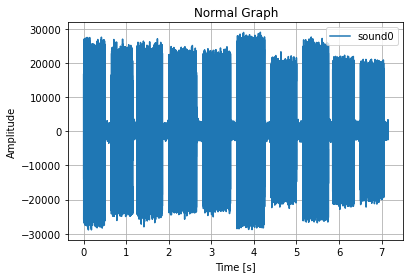

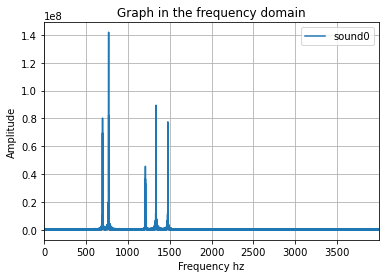

In [8]:
index = int(input('Enter Index Number (From 0 to 99) : '))

sr=8000

tn=np.arange(0, len(signal_df['Signal_data'][index])/sr, 1/sr)

x = np.fft.fft(signal_df['Signal_data'][index])
x_mag = abs(x)

fq = np.arange(0, sr, sr/len(signal_df['Signal_data'][index]))
if len(fq)==(len(signal_df['Signal_data'][index])):
    fq=fq
else:
    fq = np.arange(0, 7999.9999, sr/len(signal_df['Signal_data'][index]))


plt.plot(tn,signal_df['Signal_data'][index], label = "{}".format(signal_df['File_name'][index]))
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Normal Graph")
#plt.xlim([6.049, 6.155])
plt.grid()
plt.legend()
plt.show()

plt.plot(fq, x_mag, label = "{}".format(signal_df['File_name'][index]))
plt.xlabel("Frequency hz")
plt.ylabel("Amplitude")
plt.title("Graph in the frequency domain")
plt.grid()
plt.legend()
plt.xlim([0, max(fq)/2])
plt.show()

In [16]:
time_diff =int(sr*0.07)
print(time_diff)

560


In [10]:
sl = int(len(signal_df['Signal_data'][index]))
sg_indx = []
for i in range(sl):
    if signal_df['Signal_data'][index][i]>8000 or signal_df['Signal_data'][index][i]<-8000:
        sg_indx.append(i)
    else:
        continue        
sg_indx = np.array(sg_indx)
sg_indx

array([    0,     1,     2, ..., 56409, 56411, 56412])

In [11]:
sg_indx_ln = len(sg_indx)
sg_indx_ln

24457

In [12]:
sg_indx_diff = []
for i in range(sg_indx_ln-1):
    d = sg_indx[i+1] - sg_indx[i]
    sg_indx_diff.append(d)
sg_indx_diff = np.array(sg_indx_diff)
sg_indx_diff

array([1, 1, 1, ..., 1, 2, 1])

In [13]:
sg_indx_diff_ln = len(sg_indx_diff)
sg_indx_diff_ln

24456

In [15]:
sg_indx_br = np.where(sg_indx_diff>time_diff)
sg_indx_br

(array([ 2277,  4413,  7088,  9827, 12520, 15493, 17776, 20477, 22420],
       dtype=int64),)

In [ ]:
print(sg_indx[0: sg_indx_br[0][0]])
print(sg_indx[((sg_indx_br[0][0])+1) : sg_indx_br[0][1]])
print(sg_indx[((sg_indx_br[0][8])+1) : sg_indx_br[0][2]])

In [ ]:
sgdr = sg_indx[((sg_indx_br[0][1])+1) : sg_indx_br[0][2]]
sgdr

In [ ]:
sg_digit_range = []
sg_digit_range.append(sg_indx[0: sg_indx_br[0][0]])
for i in range(8):
    sgdr = sg_indx[((sg_indx_br[0][i])+1) : sg_indx_br[0][i+1]]
    sg_digit_range.append(sgdr)
sg_digit_range.append(sg_indx[((sg_indx_br[0][8])+1):])
sg_digit_range

In [ ]:
sg_digit_range[0][:]

In [ ]:
signal_df['Signal_data'][0][0:3998]

In [ ]:
x = np.fft.fft(signal_df['Signal_data'][0][0:3998]) # using fast fourier transform
x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
frq = []
for i in range(800): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
    if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
        frq.append(i)
fq = np.arange(0, 8000, 8000/1600)
fq[frq]

In [ ]:
fq[1799]

In [ ]:
def frequency(): #Takes index as the input
    x = np.fft.fft(signal_df['Signal_data'][5][:1867]) # using fast fourier transform
    x_mag = abs(x) # coverting the fast fourier transform from complex numbers to absolute values
    frq = []
    for i in range(1867): # using 4000 since fft reapeats itself after half the datapoints (so 8000/2 = 4000)
        if x_mag[i] > 6969420: # defining a limit below which it must ignore the amplitudes.
            frq.append(i)
   
frequency()

In [ ]:
digit_df

In [ ]:
#creating a dataframe with all the digits and its frequencies. (we have used 10 instead of * and 11 instead of # to avoid errors)
digit = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 11]
f1 = [697, 697, 697, 770, 770, 770, 852, 852, 852, 941, 941, 941]
f2 = [1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]
digit_table = list(zip(digit,f1,f2))
digit_df = pd.DataFrame(data = digit_table, columns=['digit', 'f1', 'f2'])